### Native Python dates and times
* https://docs.python.org/3/library/datetime.html
* http://labix.org/python-dateutil
* Pandas
    * https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
* Numpy
    * https://numpy.org/doc/stable/reference/arrays.datetime.html

- object
    - timedelta
    - tzinfo
        - timezone
    - time
    - date
        - datetime

In [6]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [11]:
from dateutil import parser
parser.parse("4th of July, 2015")

datetime.datetime(2015, 7, 4, 0, 0)

In [12]:
#https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
datetime(year=2015, month=7, day=4).strftime('%A')

'Saturday'

### Typed arrays of times: NumPy's datetime64

In [14]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [15]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [16]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [17]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [18]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

### Dates and times in pandas: best of both worlds
Pandas se basa en todas las herramientas que acabamos de comentar para proporcionar un objeto de **timestamp**, que combina la facilidad de uso de **datetime y dateutil** con el almacenamiento eficiente y la interfaz vectorizada de **numpy.datetime64**.

In [19]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [20]:
date.strftime('%A')

'Saturday'

In [21]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series

In [24]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [25]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [26]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [31]:
pd.date_range('2015-07-03', '2015-07-10')
pd.date_range('2015-07-03', periods=8)
pd.date_range('2015-07-03', periods=8, freq='D')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [30]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [35]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [38]:
pd.timedelta_range(0, periods=9, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets

In [37]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [42]:
from pandas.tseries.offsets import BDay #Business day
pd.date_range('2015-07-01', periods=5, freq=BDay())
pd.date_range('2015-07-01', periods=5, freq="B")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [41]:
pd.date_range('2015-07-01', periods=5, freq="B")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [46]:
pd.date_range('2015-07-31', periods=5, freq="BMS")

DatetimeIndex(['2015-08-03', '2015-09-01', '2015-10-01', '2015-11-02',
               '2015-12-01'],
              dtype='datetime64[ns]', freq='BMS')

In [67]:
# financial data from yahoo
import pandas_datareader.data as pdr
df = pdr.DataReader('MSFT', start='2004', end='2016', data_source='yahoo')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-01-02,27.770000,27.330000,27.580000,27.450001,44487700.0,17.548555
2004-01-05,28.180000,27.719999,27.730000,28.139999,67333700.0,17.989658
2004-01-06,28.280001,28.070000,28.190001,28.240000,46950800.0,18.053591
2004-01-07,28.309999,28.010000,28.170000,28.209999,54298200.0,18.034420
2004-01-08,28.480000,28.000000,28.389999,28.160000,58810800.0,18.002451


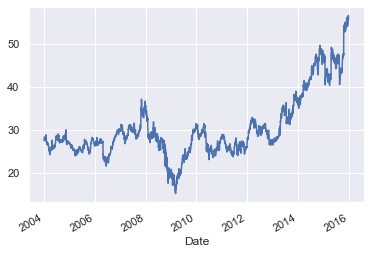

In [70]:
yahoo = df['Close']
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
df['Close'].plot();

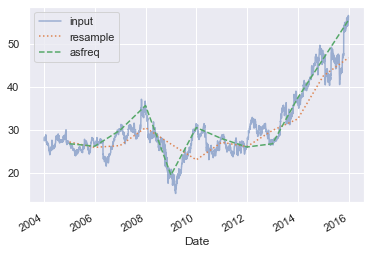

In [84]:
df['Close'].plot(alpha=0.5, style='-')
df['Close'].resample('BA').mean().plot(style=':')
df['Close'].asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');